In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [4]:
DATE_TRAIN_FROM = pd.Timestamp("2009-04-01")
DATE_TRAIN_TO = pd.Timestamp("2020-01-01")
DATE_TEST_FROM = pd.Timestamp("2020-04-01")
DATE_TEST_TO = pd.Timestamp("2022-01-01")

# will store metrics of all models used to compare mutually
summary_df = pd.DataFrame(
    columns=[
        "Buy & Hold Index",
        "Equal Weights Assets",
        "Market cap Adj Weights",
        "Exp. Mean reversion",
        "Sharpe optimalization"
        ],
    index=[
        "Average annual return",
        "Average daily volatility",
        "Sharpe",
        "Sortino",
    ]
)

datapath = Path.cwd() / "data"

snp_test = None
snp_train = None

colnames_per_sector_filtered = []
dfs_per_sector_filtered = []
colnames_per_sector = []
dfs_per_sector = []
market_cap_dfs = []

dfs_per_sector_pf5_train = []
dfs_per_sector_pf5_test = []
colnames_per_sector_pf5 = []

for dir in datapath.iterdir():
    if dir.name == "indices":
        for symb in dir.iterdir():
            if symb.name.split('.')[0] == '^GSPC':
                df = pd.read_csv(datapath / dir / symb, index_col=0)
                df.index = pd.to_datetime(df.index)
                df_train = df[(DATE_TRAIN_FROM <= df.index) & (df.index <= DATE_TRAIN_TO)]
                df_test = df[(DATE_TEST_FROM <= df.index) & (df.index <= DATE_TEST_TO)]
                snp_train = df_train["Close"].pct_change()
                snp_test = df_test["Close"].pct_change()
                break
        continue

    colnames_this_sector = []
    dfs_this_sector = pd.DataFrame()
    dfs_this_sector_filtered = pd.DataFrame()
    market_cap_df = pd.DataFrame()
    colnames_this_sector_pf5 = []
    dfs_this_sector_pf5_train = pd.DataFrame()
    dfs_this_sector_pf5_test = pd.DataFrame()
    colnames_this_sector_filtered = []

    for symb in dir.iterdir():
        include_pf5_df = False
        ticker = symb.name.split('.')[0]
        df = pd.read_csv(datapath / dir / symb, index_col=0)
        df.index = pd.to_datetime(df.index)
        
        df_train = df[(DATE_TRAIN_FROM <= df.index) & (df.index <= DATE_TRAIN_TO)]
        print('len df train:', len(df_train))
        if len(df_train) == 2707:
            include_pf5_df = True

        df = df[(DATE_TEST_FROM <= df.index) & (df.index <= DATE_TEST_TO)]
        print('len df:', len(df))
        if len(df.index) < 443:
            continue

        returns = df["Close"].pct_change()

        if include_pf5_df:
            dfs_this_sector_pf5_train[ticker] = df_train["Close"].pct_change()
            dfs_this_sector_pf5_test[ticker] = returns
            colnames_this_sector_pf5.append(ticker)
        
        colnames_this_sector.append(ticker)
        dfs_this_sector[ticker] = returns
        if "MarketCap" in df.columns:
            colnames_this_sector_filtered.append(ticker)
            dfs_this_sector_filtered[ticker] = returns
            market_cap_df[ticker] = df["MarketCap"]
    
    dfs_per_sector_filtered.append(dfs_this_sector_filtered)
    dfs_per_sector.append(dfs_this_sector)
    colnames_per_sector.append(colnames_this_sector)
    colnames_per_sector_filtered.append(colnames_this_sector_filtered)
    market_cap_dfs.append(market_cap_df)

    dfs_per_sector_pf5_train.append(dfs_this_sector_pf5_train)
    dfs_per_sector_pf5_test.append(dfs_this_sector_pf5_test)
    colnames_per_sector_pf5.append(colnames_this_sector_pf5)
    
all_returns_df = pd.DataFrame(index=snp_test.index)

for k in colnames_per_sector_pf5:
    print(k)


len df train: 2707
len df: 443
len df train: 2515
len df: 443
len df train: 2707
len df: 443
len df train: 2707
len df: 443
len df train: 2707
len df: 443
len df train: 205
len df: 443
len df train: 2707
len df: 443
len df train: 2707
len df: 443
len df train: 2707
len df: 443
len df train: 2707
len df: 443
len df train: 1917
len df: 443
len df train: 2707
len df: 443
len df train: 2707
len df: 443
len df train: 2707
len df: 443
len df train: 2707
len df: 443
len df train: 2707
len df: 443
len df train: 2707
len df: 443
len df train: 2707
len df: 443
len df train: 2707
len df: 443
len df train: 2707
len df: 443
len df train: 2707
len df: 443
len df train: 2707
len df: 443
len df train: 2707
len df: 443
len df train: 2294
len df: 443
len df train: 2707
len df: 443
len df train: 2707
len df: 443
len df train: 2707
len df: 443
len df train: 2707
len df: 443
len df train: 2707
len df: 443
len df train: 2707
len df: 443
len df train: 1750
len df: 443
len df train: 2707
len df: 443
len df tr

### Strategy 1 - Equal weights

[            nan  1.89895115e-02 -1.52742019e-02  7.57758453e-02
  1.12615645e-02  4.44188253e-02  2.68159325e-02 -1.86358380e-02
  2.46456637e-02 -3.44542238e-02 -7.16147569e-03  4.27923549e-02
 -2.34759367e-02 -2.80392095e-02  1.92162081e-02  3.01480190e-03
  1.09795650e-02  2.51330119e-02  9.58936805e-03  3.25138347e-02
 -2.06384178e-02 -3.39614614e-02  3.89020784e-03  4.48492965e-03
 -1.73275215e-02  1.64707141e-02  2.77269232e-02 -9.86328545e-03
 -2.32421685e-02 -2.59517596e-02  1.44681130e-02  1.02727656e-03
  5.31854475e-02 -1.53032573e-02  1.94209340e-02 -6.84463464e-03
  2.26069930e-03  2.74544137e-02  2.19205990e-02 -6.02682481e-03
  1.14638140e-04  1.10470297e-02  1.16798500e-02  2.34625820e-02
  2.34911226e-03  3.52484777e-02  2.27526987e-02 -2.05978462e-02
 -1.83974423e-02 -6.80341271e-02  2.01393117e-02  9.61053175e-03
  2.03609427e-02 -1.16083328e-02  7.29721426e-04 -1.20574720e-02
  1.16233547e-03  1.00754532e-03 -3.14477823e-02  1.02961074e-02
 -2.31196218e-02  1.99815

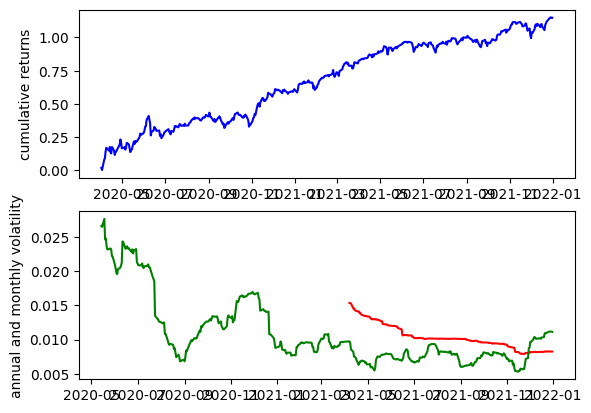

In [5]:
num_rows = len(dfs_per_sector[0])
num_sectors = len(dfs_per_sector)
returns_vector = np.zeros(num_rows)
for return_df in dfs_per_sector:
    mean_returns = return_df.mean(axis=1) # equal weights within one sector
    returns_vector += mean_returns.values

returns_vector /= num_sectors
print(returns_vector)


pf1 = pd.DataFrame({
    "pf_daily_returns": returns_vector,
    }, index=dfs_per_sector[0].index)

pf1["pf_cum_returns"] = (1 + pf1["pf_daily_returns"]).cumprod() - 1
pf1["ann_volatility"] = pf1["pf_daily_returns"].rolling(255).std()
pf1["mon_volatility"] = pf1["pf_daily_returns"].rolling(30).std()

print(pf1)

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(pf1.index, pf1["pf_cum_returns"], color="blue", label="cumulative_returns")
ax1.set_ylabel('cumulative returns')

ax2.plot(pf1.index, pf1["ann_volatility"], color="red", label="ann_volatility")
ax2.plot(pf1.index, pf1["mon_volatility"], color="green", label="mon_volatility")
ax2.set_ylabel('annual and monthly volatility')

risk_free = 0.0
sharpe = (pf1["pf_daily_returns"].mean() * 255 - risk_free) / (pf1["pf_daily_returns"].std() * np.sqrt(255))
sortino = (pf1["pf_daily_returns"].mean() * 255 - risk_free) / (pf1[pf1["pf_daily_returns"] < 0]["pf_daily_returns"].std() * np.sqrt(255))

avg_daily_vola = pf1["pf_daily_returns"].std()
avg_ann_return = pf1["pf_daily_returns"].mean() * 255

print('sharpe:', sharpe)
print('sortino:', sortino)
print('average daily volatility:', avg_daily_vola)
print('average annual return:', avg_ann_return)

summary_df["Equal Weights Assets"] = [avg_ann_return, avg_daily_vola, sharpe, sortino]
print(summary_df["Equal Weights Assets"])

all_returns_df["Equal Weights Assets"] = pf1["pf_cum_returns"]

plt.show()

### Strategy 2 - Buy & Hold the S&P500

sharpe: 2.2351243494925153
sortino: 3.03671977462815
average daily volatility: 0.011065843717569274
average annual return: 0.3949629085444526
Average annual return       0.394963
Average daily volatility    0.011066
Sharpe                      2.235124
Sortino                     3.036720
Name: Buy & Hold Index, dtype: float64


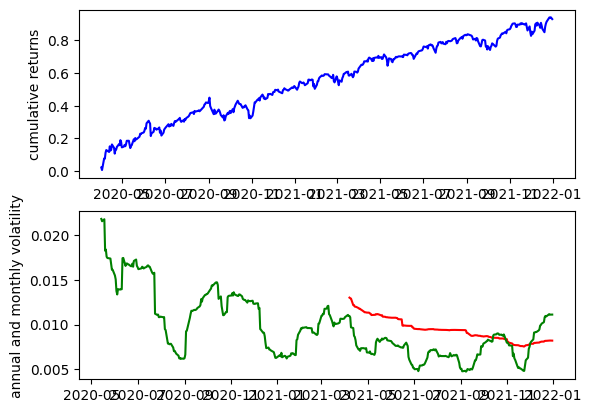

In [6]:
pf2 = pd.DataFrame({
    "pf_daily_returns": snp_test,
    "pf_cum_returns": (1 + snp_test).cumprod() - 1,
    "ann_volatility": snp_test.rolling(255).std(),
    "mon_volatility": snp_test.rolling(30).std()
    }, index=snp_test.index)

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(pf1.index, pf2["pf_cum_returns"], color="blue", label="cumulative_returns")
ax1.set_ylabel('cumulative returns')

ax2.plot(pf1.index, pf2["ann_volatility"], color="red", label="ann_volatility")
ax2.plot(pf1.index, pf2["mon_volatility"], color="green", label="mon_volatility")
ax2.set_ylabel('annual and monthly volatility')

import numpy as np

risk_free = 0.0
sharpe = (pf2["pf_daily_returns"].mean() * 255 - risk_free) / (pf2["pf_daily_returns"].std() * np.sqrt(255))
sortino = (pf2["pf_daily_returns"].mean() * 255 - risk_free) / (pf2[pf2["pf_daily_returns"] < 0]["pf_daily_returns"].std() * np.sqrt(255))
avg_ann_return = pf2["pf_daily_returns"].mean() * 255
avg_daily_vola = pf2["pf_daily_returns"].std()

print('sharpe:', sharpe)
print('sortino:', sortino)
print('average daily volatility:', avg_daily_vola)
print('average annual return:', avg_ann_return)

summary_df["Buy & Hold Index"] = [avg_ann_return, avg_daily_vola, sharpe, sortino]
print(summary_df["Buy & Hold Index"])

all_returns_df["Buy & Hold Index"] = pf2["pf_cum_returns"]

plt.show()

### Strategy 3 - Market cap adjusted weights  

443
443
Date
2020-04-01    0.000000
2020-04-02    0.027394
2020-04-03   -0.015662
2020-04-06    0.068508
2020-04-07    0.002882
                ...   
2021-12-27    0.012069
2021-12-28    0.001683
2021-12-29    0.001007
2021-12-30   -0.001942
2021-12-31   -0.000402
Length: 443, dtype: float64
DatetimeIndex(['2020-04-01', '2020-04-02', '2020-04-03', '2020-04-06',
               '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-13',
               '2020-04-14', '2020-04-15',
               ...
               '2021-12-17', '2021-12-20', '2021-12-21', '2021-12-22',
               '2021-12-23', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='Date', length=443, freq=None)
            pf_daily_returns  pf_cum_returns  ann_volatility  mon_volatility
Date                                                                        
2020-04-01          0.000000        0.000000             NaN             NaN
2020-04-02 

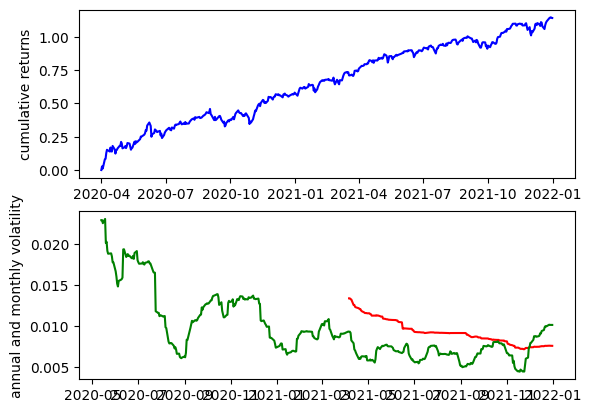

In [7]:

num_sectors_with_marketcap = len(colnames_per_sector_filtered)

pf_returns = np.zeros(num_rows)
for market_cap_df, ticker_names, returns_df in zip(
    market_cap_dfs, colnames_per_sector_filtered, dfs_per_sector_filtered
    ):
    sum_market_caps = market_cap_df.sum(axis=1)
    weight_matrix = market_cap_df.div(sum_market_caps, axis=0)
    weight_matrix /= num_sectors_with_marketcap
    this_sector_return = (weight_matrix * returns_df).sum(axis=1)
    pf_returns += this_sector_return.values

pf_returns = pd.Series(pf_returns, index=returns_df.index)
print(len(pf_returns))
print(len(returns_df))
print(pf_returns)
print(returns_df.index)
pf3 = pd.DataFrame({
    "pf_daily_returns": pf_returns,
    "pf_cum_returns": (1 + pf_returns).cumprod() - 1,
    "ann_volatility": pf_returns.rolling(255).std(),
    "mon_volatility": pf_returns.rolling(30).std(),
    }, index=pf_returns.index)

print(pf3)

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(pf3.index, pf3["pf_cum_returns"], color="blue", label="cumulative_returns")
ax1.set_ylabel('cumulative returns')

ax2.plot(pf1.index, pf3["ann_volatility"], color="red", label="ann_volatility")
ax2.plot(pf1.index, pf3["mon_volatility"], color="green", label="mon_volatility")
ax2.set_ylabel('annual and monthly volatility')

import numpy as np

risk_free = 0.0
sharpe = (pf3["pf_daily_returns"].mean() * 255 - risk_free) / (pf3["pf_daily_returns"].std() * np.sqrt(255))
sortino = (pf3["pf_daily_returns"].mean() * 255 - risk_free) / (pf3[pf3["pf_daily_returns"] < 0]["pf_daily_returns"].std() * np.sqrt(255))
avg_daily_vola = pf3["pf_daily_returns"].std()
avg_ann_return = pf3["pf_daily_returns"].mean() * 255
print('sharpe:', sharpe)
print('sortino:', sortino)
print('average daily volatility:', avg_daily_vola)
print('average annual return:', avg_ann_return)

summary_df["Market cap Adj Weights"] = [avg_ann_return, avg_daily_vola, sharpe, sortino]

all_returns_df["Market cap Adj Weights"] = pf3["pf_cum_returns"]

plt.show()

### Strategy 4 - (Experimental) mean-reversion  

In [8]:
PERIOD = 30
rel_momentum_dfs = []

for returns in dfs_per_sector:
    rel_momentum = pd.DataFrame()
    for col in returns.columns:
        rolling_max = returns[col].rolling(PERIOD, min_periods=10).max()
        rolling_min = returns[col].rolling(PERIOD, min_periods=10).min()
        rel_mom = (returns[col] - rolling_min) / (rolling_max - rolling_min)
        rel_momentum[col] = rel_mom
    rel_momentum_dfs.append(rel_momentum)

rolling_max = snp_test.rolling(PERIOD, min_periods=10).max()
rolling_min = snp_test.rolling(PERIOD, min_periods=10).min()
rel_momentum_snp = (snp_test - rolling_min) / (rolling_max - rolling_min + 1e-08)

norm_weights_matrix = []

for rel_df in rel_momentum_dfs:
    weights = rel_df.rdiv(rel_momentum_snp, axis=0)
    sum_weights = weights.sum(axis=1)
    res_weights = weights.div(sum_weights, axis=0).div(num_sectors)
    norm_weights_matrix.append(res_weights)

returns_vector = np.zeros(norm_weights_matrix[0].shape[0])
for returns, weight_m in zip(dfs_per_sector, norm_weights_matrix):
    r = (returns * weight_m).sum(axis=1).values
    returns_vector += r

print(returns_vector)


[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -7.05365181e-03  2.97398158e-02
 -2.45060217e-03  0.00000000e+00  1.11754205e-02 -3.59295008e-03
  3.17803097e-03  1.72614623e-02 -4.10963277e-04  1.96737300e-02
 -6.26048435e-03 -1.24103421e-02 -9.84191293e-04 -7.45239998e-04
 -9.53642066e-03  1.02530134e-02  2.23436030e-02 -1.37999336e-02
 -1.73834972e-02 -1.68419361e-02  8.62981182e-03 -1.95212333e-03
  4.45470489e-02 -1.40343931e-02  1.12370684e-02 -9.52313943e-03
 -1.95523611e-04  1.80891654e-02  1.41631988e-02 -9.88825871e-03
 -6.18990428e-03  7.68382681e-03  8.86824281e-03  1.80221988e-02
 -3.87474462e-03  3.00619246e-02  1.50315170e-02 -9.04093671e-03
 -1.56973089e-02  0.00000000e+00  1.52888214e-02  7.14918817e-03
  1.81044439e-02 -1.59880134e-02 -5.49625478e-04 -9.32387376e-03
 -1.90687211e-03 -6.75526269e-04 -3.35810104e-02  8.57740323e-03
 -1.29165197e-02  1.84474

443
443
sharpe: 1.8230741718900674
sortino: 3.228034192812217
average daily volatility: 0.0076719096569069995
average annual return: 0.2233458609589349


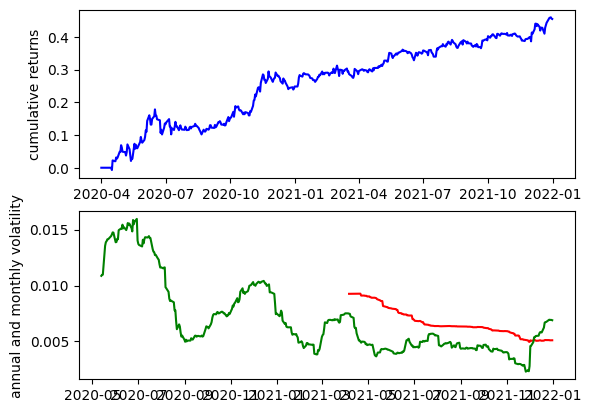

In [9]:
returns_vector = pd.Series(returns_vector, index=norm_weights_matrix[0].index)
print(len(returns_vector))
print(len(norm_weights_matrix[0].index))

pf4 = pd.DataFrame({
    "pf_daily_returns": returns_vector,
    "pf_cum_returns": (1 + returns_vector).cumprod() - 1,
    "ann_volatility": returns_vector.rolling(255).std(),
    "mon_volatility": returns_vector.rolling(30).std()
    }, index=norm_weights_matrix[0].index)

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(pf4.index, pf4["pf_cum_returns"], color="blue", label="cumulative_returns")
ax1.set_ylabel('cumulative returns')

ax2.plot(pf4.index, pf4["ann_volatility"], color="red", label="ann_volatility")
ax2.plot(pf4.index, pf4["mon_volatility"], color="green", label="mon_volatility")
ax2.set_ylabel('annual and monthly volatility')

risk_free = 0.0
sharpe = (pf4["pf_daily_returns"].mean() * 255 - risk_free) / (pf4["pf_daily_returns"].std() * np.sqrt(255))
sortino = (pf4["pf_daily_returns"].mean() * 255 - risk_free) / (pf4[pf4["pf_daily_returns"] < 0]["pf_daily_returns"].std() * np.sqrt(255))
avg_daily_vola = pf4["pf_daily_returns"].std()
avg_ann_return = pf4["pf_daily_returns"].mean() * 255
print('sharpe:', sharpe)
print('sortino:', sortino)
print('average daily volatility:', avg_daily_vola)
print('average annual return:', avg_ann_return)

summary_df["Exp. Mean reversion"] = [avg_ann_return, avg_daily_vola, sharpe, sortino]

all_returns_df["Exp. Mean reversion"] = pf4["pf_cum_returns"]

plt.show()

### Strategy 5 - Asset weight determination using sharpe ratio optimalization  

sharpe: 2.27585696615303
sortino: 3.106676756447313
average daily volatility: 0.010107192466862565
average annual return: 0.36732085790059016


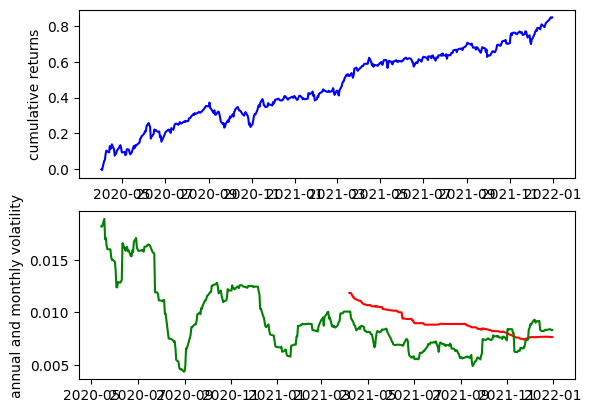

In [10]:
from scipy.optimize import minimize

BOOTSTRAP_WINDOW = 365
num_rows_train = len(dfs_per_sector_pf5_train[0])
num_rows_test = len(dfs_per_sector_pf5_test[0])

def optimize(df_section, risk_free=0):
    # df_section is a dataframe of length BOOTSTRAP_WINDOW with the columns being all the assets
    cov = np.cov(df_section, rowvar=False)
    mean_returns = df_section.mean(axis=0)

    n_assets = len(mean_returns)

    constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
    bounds = tuple((0, 1) for _ in range(n_assets))

    def sharpe_performance(weights):
        return (np.dot(mean_returns, weights) - risk_free) / np.sqrt(weights.T @ cov @ weights)

    def neg_sharpe(weights):
        return -sharpe_performance(weights)

    x0 = np.ones(n_assets) / n_assets
    
    return minimize(neg_sharpe, x0, method='SLSQP', bounds=bounds, constraints=constraints).x

all_returns_test = np.empty((num_rows_test, sum([len(rdf.columns) for rdf in dfs_per_sector_pf5_test])))
all_returns_train = np.empty((num_rows_train, sum([len(rdf.columns) for rdf in dfs_per_sector_pf5_train])))

i = 0
for pf5_train, pf5_test in zip(dfs_per_sector_pf5_train, dfs_per_sector_pf5_test):
    for col in pf5_train.columns:
        all_returns_train[:,i] = pf5_train[col]
        all_returns_test[:,i] = pf5_test[col]
        i += 1

all_returns_train = pd.DataFrame(all_returns_train, index=dfs_per_sector_pf5_train[0].index).iloc[1:]
all_returns_test = pd.DataFrame(all_returns_test, index=dfs_per_sector_pf5_test[0].index).iloc[1:]

resulting_weights = []

for idx in range(BOOTSTRAP_WINDOW, num_rows_train, BOOTSTRAP_WINDOW):
    df_section = all_returns_train.iloc[:idx]
    #print('df section'); print(df_section)
    weights = optimize(df_section)
    #print('current weights:', weights)
    resulting_weights.append(weights)

resulting_weights = np.array(resulting_weights)
final_weights = resulting_weights.mean(axis=0)

ret = np.matmul(all_returns_test.values, final_weights)

ret = pd.Series(ret, index=all_returns_test.index)

pf5 = pd.DataFrame({
    'pf_daily_returns': ret,
    'pf_cum_returns': (1 + ret).cumprod() - 1,
    'ann_volatility': ret.rolling(255).std(),
    'mon_volatility': ret.rolling(30).std()
})

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(pf5.index, pf5["pf_cum_returns"], color="blue", label="cumulative_returns")
ax1.set_ylabel('cumulative returns')

ax2.plot(pf5.index, pf5["ann_volatility"], color="red", label="ann_volatility")
ax2.plot(pf5.index, pf5["mon_volatility"], color="green", label="mon_volatility")
ax2.set_ylabel('annual and monthly volatility')

import numpy as np

risk_free = 0.0
sharpe = (pf5["pf_daily_returns"].mean() * 255 - risk_free) / (pf5["pf_daily_returns"].std() * np.sqrt(255))
sortino = (pf5["pf_daily_returns"].mean() * 255 - risk_free) / (pf5[pf5["pf_daily_returns"] < 0]["pf_daily_returns"].std() * np.sqrt(255))
avg_daily_vola = pf5["pf_daily_returns"].std()
avg_ann_return = pf5["pf_daily_returns"].mean() * 255
print('sharpe:', sharpe)
print('sortino:', sortino)
print('average daily volatility:', avg_daily_vola)
print('average annual return:', avg_ann_return)

summary_df["Sharpe optimalization"] = [avg_ann_return, avg_daily_vola, sharpe, sortino]

all_returns_df["Sharpe optimalization"] = pf5["pf_cum_returns"]

plt.show()




                          Buy & Hold Index  Equal Weights Assets  \
Average annual return             0.394963              0.462083   
Average daily volatility          0.011066              0.012757   
Sharpe                            2.235124              2.268296   
Sortino                           3.036720              3.269368   

                          Market cap Adj Weights  Exp. Mean reversion  \
Average annual return                   0.454575             0.223346   
Average daily volatility                0.011182             0.007672   
Sharpe                                  2.545658             1.823074   
Sortino                                 3.459555             3.228034   

                          Sharpe optimalization  
Average annual return                  0.367321  
Average daily volatility               0.010107  
Sharpe                                 2.275857  
Sortino                                3.106677  


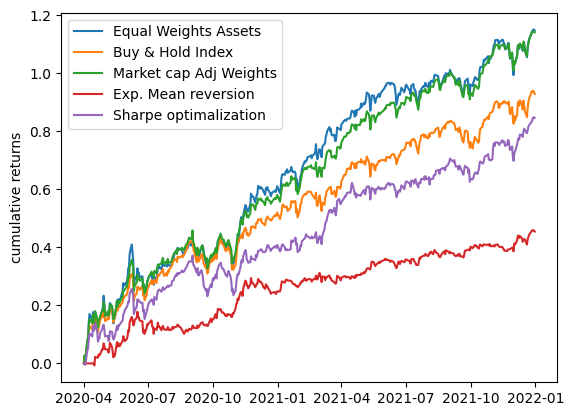

In [11]:
print(summary_df)

fig, ax = plt.subplots()

for colname in all_returns_df.columns:
    ax.plot(all_returns_df.index, all_returns_df[colname], label=colname)

ax.set_ylabel('cumulative returns')
ax.legend()

plt.show()

### Conclusion

There is a noticable difference in the ratio of performance metrics between the strategies when compared to the ratio when looking at the bear-market simulation. The most noticable by far is the underperformance of the experimental mean-reversion strategy, which, compared to simply buying & holding the market or holding equal weights in assets for example, performed relatively poorly. This is in contrast to the outperformance of this same strategy in the bear-market scenario.

I think that this conclusion does make sense however, since any mean-reversion strategy waits for the respective asset to have a period of poor returns compared to previous ones, but in this simulation, where we're considering a relatively stable bull market, these events happen way less often.